In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from gensim.models import Word2Vec

In [3]:
df=pd.read_excel('./data/clean_data_tranlsated.xlsx')

In [4]:
df2=df[['merged_description','group']].copy()

sentences = [line.split(' ') for line in df2['merged_description']]
word2vec = Word2Vec(sentences=sentences,min_count=1)
word2vec.wv.save_word2vec_format('word2vec.txt')

embeddings_index = dict()
f = open('word2vec.txt')

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

<AxesSubplot:xlabel='group', ylabel='count'>

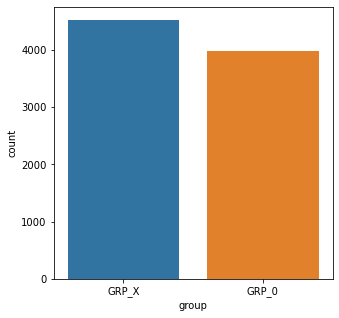

In [35]:
# Create the Dataset for classifying GRP_0
df_grp0 = df.copy()
df_grp0['group']=df_grp0['group'].apply(lambda x : 'GRP_X' if x != 'GRP_0'  else x)

descending_order = df_grp0['group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(5,5))
sns.countplot(x='group', data=df_grp0,order=descending_order)

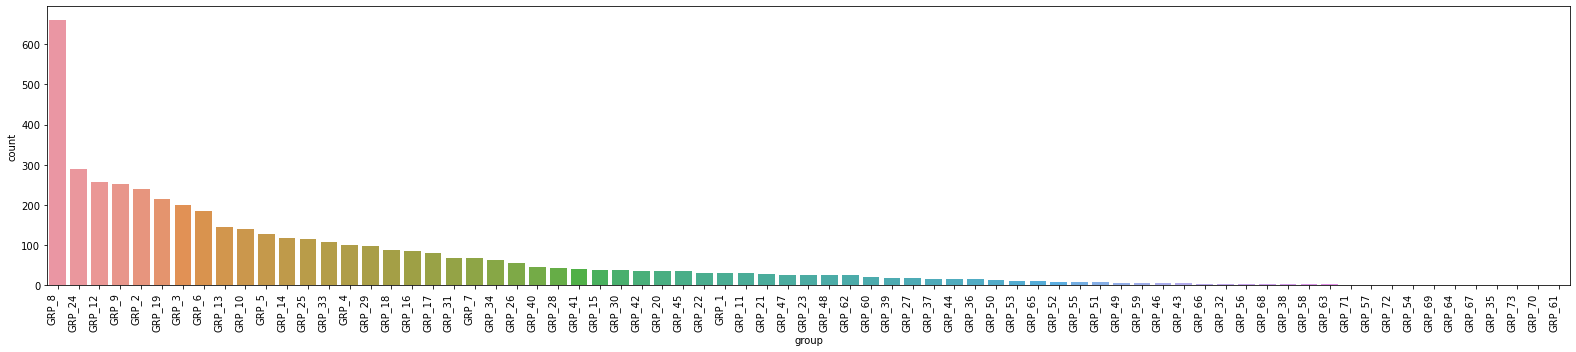

In [37]:
#Create Dataset for 'others' i.e all groups which is not part of GRP_0
df_grpX = df[df['group'] != 'GRP_0']

descending_order = df_grpX['group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='group', data=df_grpX,order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [38]:
maxOthers = df_grpX['group'].value_counts().max()
maxOthers

661

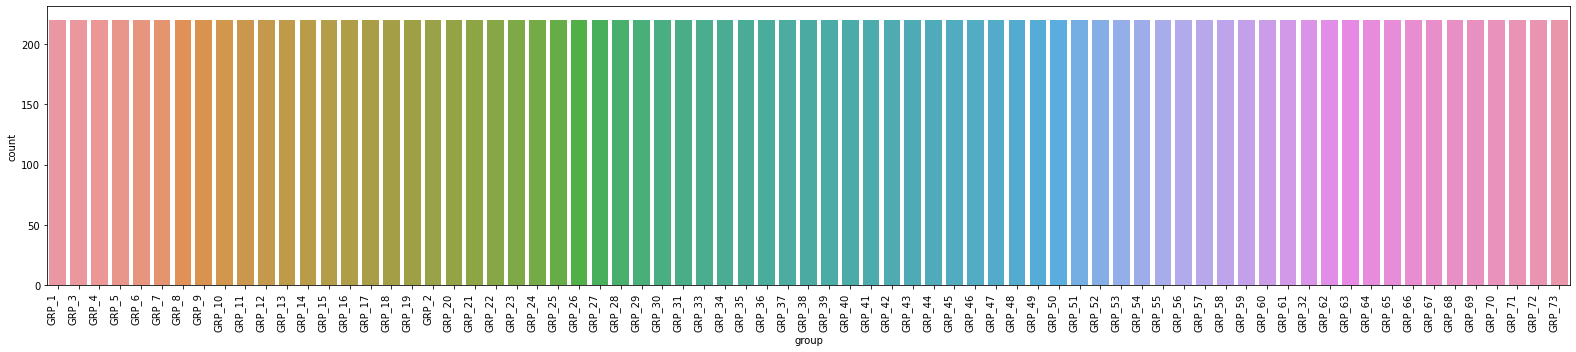

In [40]:
from sklearn.utils import resample
df_grpX_resampled = df_grpX[0:0]
for grp in df_grpX['group'].unique():
    df_grp = df_grpX[df_grpX['group'] == grp]
    resampled = resample(df_grp, replace=True, n_samples=int(maxOthers/3), random_state=123)
    df_grpX_resampled = df_grpX_resampled.append(resampled)

df_resampled = pd.concat([df_grp0,df_grpX_resampled])
df_resampled.reset_index(inplace=True)

descending_order = df_grpX_resampled['group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
ax=sns.countplot(x='group', data=df_grpX_resampled)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [42]:
df_resampled.shape

(24559, 24)

In [5]:
df_outage_qs=pd.read_excel('./data/input_data.xlsx')

In [ ]:
def clean_outageq(text: str) -> str:
    """cleans up outage questionaires"""
    if text.startswith('what type of outage'):
        text=re.sub(r'\n+|\s\s+','',text)
        text=re.sub(r'(\_x000D\_)+','br',text)
        text=re.sub(r'(\(yes\/no\/na\))+|(\(yes\/no\))','br',text)
        temp=text.split('br')
        new=[]
        for x in temp:
            x=str(x)
            x=re.sub(r'\d\:\d+','',x)
            if 'yes'in x:
                x=re.sub(r'\?|(\_)+|\d\.','',x)
                x=re.sub('yes','',x)
            elif 'no' in x:
                x=re.sub(r'\?|(\_)+|\d\.','',x)
                x=re.sub('no','',x)
                x='no'+' '+x
            else:
                x=re.sub(r'\?|(\_)+|\d\.','',x)
                
            new.append(''.join(x))
        text=''.join(new)
        text=re.sub(r'what\stype\sof\soutage\:networkcircuitxpower\s\(please\sspecify\swhat\stype\sof\soutage\)','',text)
    return str(text.strip())

In [10]:
import re
for item in df_outage_qs['Description'][0]:
    print('start',item,'end')
    if str(item).find('what type of outage')==0:
        item=re.sub(r'\n+|\s\s+','',item)
        item=re.sub(r'(\_x000D\_)+','br',item)
        item=re.sub(r'(\(yes\/no\/na\))+|(\(yes\/no\))','br',item)
        temp=item.split('br')
        new=[]
        for x in temp:
            x=str(x)
            x=re.sub(r'\d\:\d+','',x)
            if 'yes'in x:
                x=re.sub(r'\?|(\_)+|\d\.','',x)
                x=re.sub('yes','',x)
            elif 'no' in x:
                x=re.sub(r'\?|(\_)+|\d\.','',x)
                x=re.sub('no','',x)
                x='no'+' '+x
            else:
                x=re.sub(r'\?|(\_)+|\d\.','',x)
                
            new.append(''.join(x))
        item=''.join(new)
        item=re.sub(r'what\stype\sof\soutage\:networkcircuitxpower\s\(please\sspecify\swhat\stype\sof\soutage\)','',item)
    print(item)

start - end
-
start v end
v
start e end
e
start r end
r
start i end
i
start f end
f
start i end
i
start e end
e
start d end
d
start   end
 
start u end
u
start s end
s
start e end
e
start r end
r
start   end
 
start d end
d
start e end
e
start t end
t
start a end
a
start i end
i
start l end
l
start s end
s
start . end
.
start ( end
(
start e end
e
start m end
m
start p end
p
start l end
l
start o end
o
start y end
y
start e end
e
start e end
e
start # end
#
start   end
 
start & end
&
start   end
 
start m end
m
start a end
a
start n end
n
start a end
a
start g end
g
start e end
e
start r end
r
start   end
 
start n end
n
start a end
a
start m end
m
start e end
e
start ) end
)
 endt 

start 
 end


start - end
-
start c end
c
start h end
h
start e end
e
start c end
c
start k end
k
start e end
e
start d end
d
start   end
 
start t end
t
start h end
h
start e end
e
start   end
 
start u end
u
start s end
s
start e end
e
start r end
r
start   end
 
start n end
n
start a end
a
start m end
